<a href="https://colab.research.google.com/github/bysubanji/Health_insurance_cross_sell_prediction/blob/main/Health_Insurance_Bhaskarsubanji.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Health Insurance Cross Sell Prediction**

### **Predict Health insurance owners' who will be interested in buying Vehicle Insurance**

Our client is an Insurance company that has supplied Health Insurance to its customers now they require help in building a model to predict whether the consumers from the past year will also be interested in Vehicle Insurance provided by the company.

**Objective**

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

# Importing Required Libreries and Data

## Importing Required Libreries, mounting of drive and loading the dataset.

In [1]:
# importing libraries
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
# Mounting of Drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Loading of data
data=pd.read_csv("/content/drive/MyDrive/Projects - Almabetter/Health_Insurance_cross_sell_prediction/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")

# Data summarization

In [4]:
# lets look at first 5 rows
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
# lets look at last 5 rows
data.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [6]:
# lets check shape, null values and datatypes,
print(data.info())
print()
print(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB
None

id                      0
Gender                  0
Age                     0
Driving_Licens

As per above observation we can say that : Dataset consists of 381109 rows & 12 columns. There are no Null or missing values present in the dataset.

In [7]:
# Descriptive Statistical Summary of Numeric Variables

data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


# Data analysis and visualizations

##### Analysis of target variable 'response per count'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


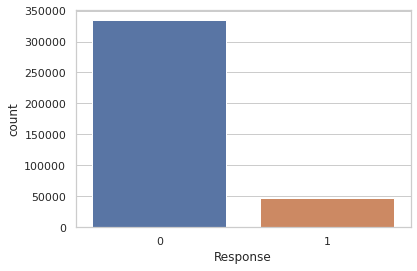

In [8]:
# Analyzing by plotting countplot
sns.set_theme(style='whitegrid')
sns.countplot(data['Response'],data=data)

* As per above observation, we can say that data is highly imbalanced

##### Analysis based on Gender

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


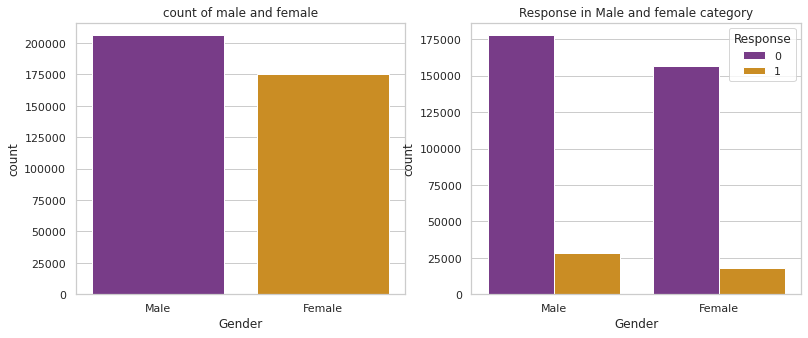

In [9]:
# Analyzing gender by plotting countplot
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(data['Gender'],palette='CMRmap')
plt.title("count of male and female")
plt.subplot(1,2,2)
sns.countplot(data['Gender'], hue = data['Response'],palette='CMRmap')
plt.title("Response in Male and female category")
plt.show()

* We observed the similairty in distribution of Gender variables.
* Male category is somewhat more noteworthy than that of female and chances of purchasing the insurance is likewise minimal high.

##### Analysis of Age vs Response

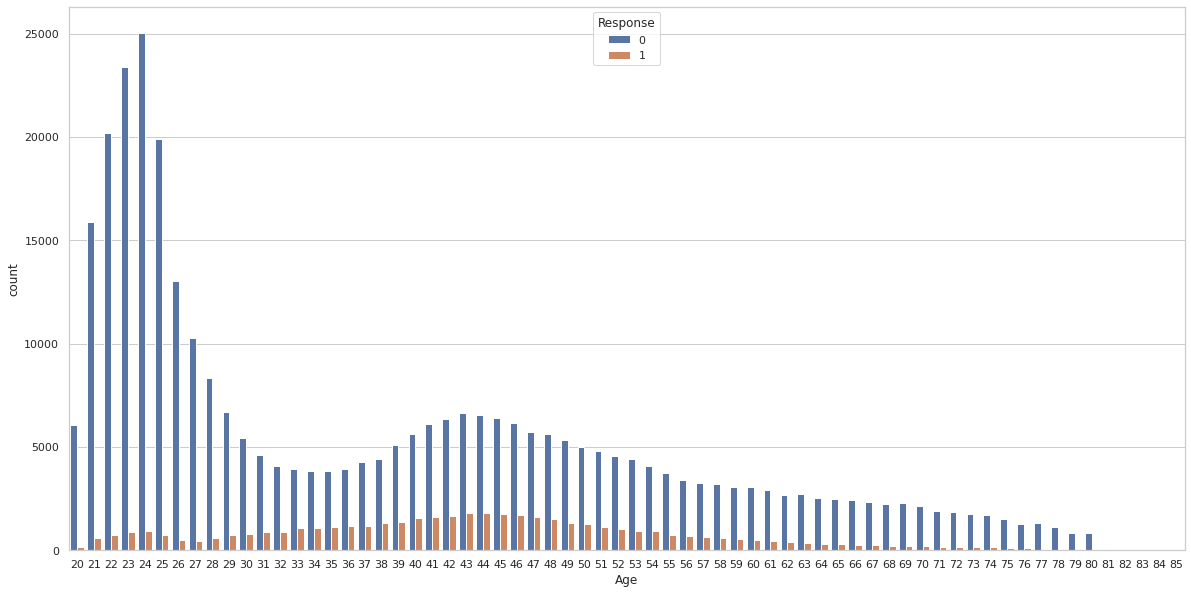

In [10]:
# Analysis of Age & Response
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Response',data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


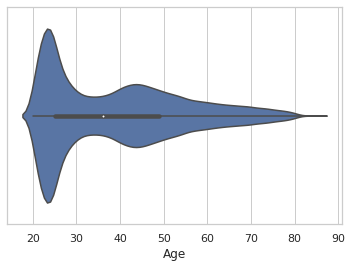

In [11]:
sns.violinplot(data['Age'])

* Youngsters under 30 are not intrigued by vehicle insurance. Reasons could be absence of involvement, less awareness about insurance and they may not have costly vehicles yet.
* People of age range between 30-60 years are more likely to be interested and willing to purchase.
* From the plot we can say that there are no outlier in the given .

#### Analysis on Driving License

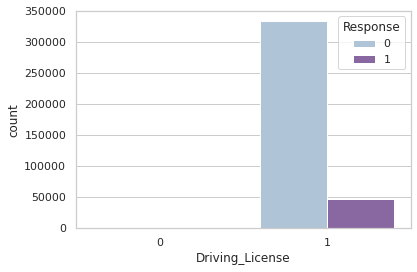

In [41]:
# Plotting countplot for Anlysis
sns.countplot(x='Driving_License',hue='Response', data=data, palette='BuPu')

* Customers most of them who showed interest in Vehicle Insurance, already  have driving license

##### Analyze : Previously_Insured w.r.t Response

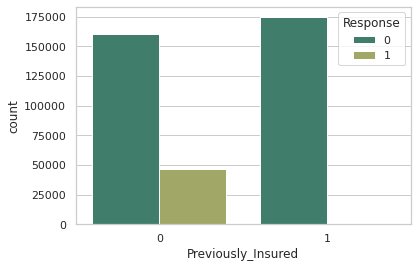

In [13]:
# Response analysis of previously insured customers from plot
sns.countplot(x='Previously_Insured',hue='Response',data=data,palette='gist_earth')

* Consumers who are not previously insured are probably interested

##### Anlysis of Vehicle_Age w.r.t Response

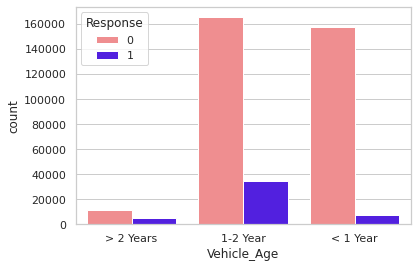

In [14]:
sns.countplot(x='Vehicle_Age',hue='Response',data=data,palette='gnuplot2_r')

* Consumers with 1-2-year-old vehicles are more interested as compared to others.

* Consumers with less than 1 year old Vehicles have very less chance of buying Insurance

##### Analysis based on Annual_Premium


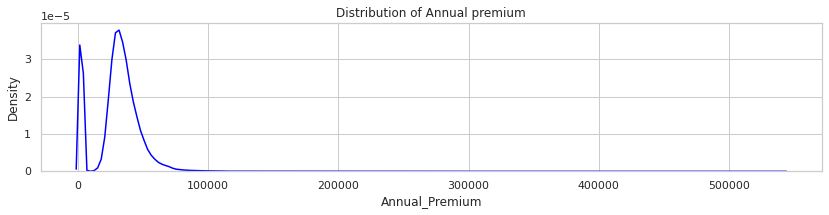

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


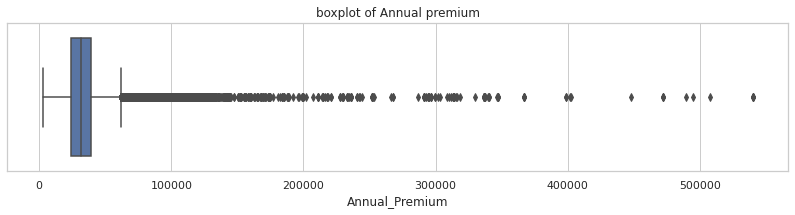

In [45]:
# Distribution of Annual premium
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.kdeplot(data['Annual_Premium'], color='blue')
plt.title("Distribution of Annual premium")
plt.show()

# Boxplot of Annual premium
plt.figure(figsize=(14,6))
plt.subplot(2,1,2)
sns.boxplot(data['Annual_Premium'])
plt.title("boxplot of Annual premium")
plt.show()


* Its observed from the distribution plot, that the annual premimum feature is right skewed.
* we can observe lot of outliers in the variables from above boxplot.

##### Defining Correlation 

Text(0.5, 1, 'Correlation of Features')

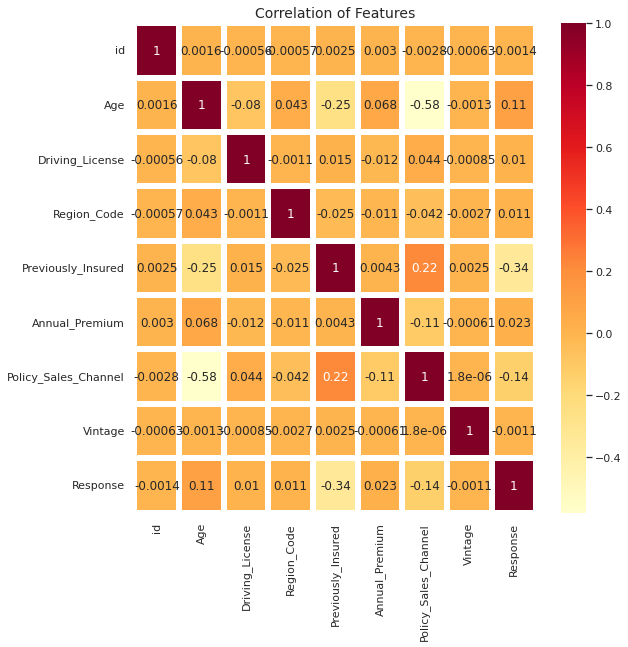

In [54]:
# Plotting heatmap to find correlation
corr = data.corr()
f, ax = plt.subplots(figsize=(9,9))
sns.heatmap(corr, ax=ax, annot=True,linewidths=5,cmap='YlOrRd')
plt.title("Correlation of Variables", y=1, size=14)

*   Vintage features's is not much affecting Target variable. So we can drop such a least correlated features's.